# Scree Plots

<https://m.blog.naver.com/PostView.nhn?blogId=hsj2864&logNo=220613527515>

<img src='https://i.imgur.com/zyWQBjA.png' width = 400>
<img src='https://i.imgur.com/f60GoIo.png' width = 400>
<br>
<img src='https://www.researchgate.net/profile/Raul_Ramirez-Velarde/publication/275541304/figure/fig1/AS:392017420013568@1470475644164/PCA-Scree-plot-and-cumulative-variance-plots.png' width = 400>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn import decomposition

X1, Y1 = make_blobs(n_features = 10, n_samples = 100, centers = 4, random_state = 4, cluster_std = 2) ## random 하게 simulation data 생성

pca = decomposition.PCA(n_components = 4)
pc = pca.fit_transform(X1)

pc_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
pc_df['Cluster'] = Y1
pc_df.head()

,PC1,PC2,PC3,PC4,Cluster
0,-8.133443,-0.302138,9.984672,0.423878,2
1,18.931381,0.193838,0.045462,-3.894042,1
2,-6.571463,-14.188490,-3.120115,1.278588,0
3,-7.533948,14.439427,-5.443487,3.358252,3
4,-4.591760,-11.315284,-9.130630,-1.420151,0


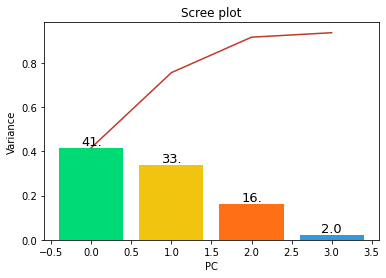

In [2]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
    
scree_plot(pca)

# Machine Learning (개요)

- ## 지도 학습 (Supervised Learning): 
Supervised Learning은 트레이닝 데이터에 라벨(답)이 있을때 사용할 수 있다. 

  - ### 분류 (Classification)
  분류 알고리즘은 주어진 데이터의 카테고리 혹은 클래스 예측을 위해 사용된다.
  - ### 회귀 (Prediction)
  회귀 알고리즘은 continuous 한 데이터를 바탕으로 결과를 예측 하기 위해 사용된다.


- ## 비지도 학습 (Unsupervised Learning):
  - ### 클러스터링 (Clustering)
  데이터의 연관된 feature를 바탕으로 유사한 그룹을 생성한다.

  - ### 차원 축소 (Dimensionality Reduction
  높은 차원을 갖는 데이터셋을 사용하여 feature selection / extraction 등을 통해 차원을 줄이는 방법이다.
  - ### 연관 규칙 학습 (Association Rule Learning)
  데이터셋의 feature들의 관계를 발견하는 방법이다 (feature-output 이 아닌 feature-feature)


- ## 강화 학습 (Reinforcement Learning)
  머신러닝의 한 형태로, 기계가 좋은 행동에 대해서는 **보상**, 그렇지 않은 행동에는 **처벌**이라는 피드백을 통해서 *행동*에 대해 학습해 나가는 형태. 

# ML Cheat Sheets (참고용)

<img src='https://jixta.files.wordpress.com/2015/11/machinelearningalgorithms.png?w=816&h=521&zoom=2'>

# Clustering 

Clustering은 Unsupervised Learning Algorithm의 한 종류. 
(Train Data에 대해서 label도 없고, 몇 개의 클러스터가 정확한지조차도 없는 경우가 있다.)

## Clustering의 목적

Clustering이 대답할수 있는 질문은 주어진 데이터들이 **얼마나, 어떻게 유사한지** 이다. 

그렇기 때문에 주어진 데이터셋을 요약/정리하는데 있어서 매우 효율적인 방법들중 하나로 사용 되고 있다. 

그러나 동시에 `정답을 보장하지 않는다`는 이슈가 있어서 production의 수준, 혹은 예측을 위한 모델링에 쓰이기 보다는 EDA를 위한 방법으로써 많이 쓰인다.

## Clustering의 종류

### Hierarchical

  - Agglomerative: 개별 포인트에서 시작후 점점 크게 합쳐감
  
  - Divisive: 한개의 큰 cluster에서 시작후 점점 작은 cluster로 나눠감

### Point Assignment

  - 시작시에 cluster의 수를 정한 다음, 데이터들을 하나씩 cluster에 배정시킴

### Hard vs Soft Clustering

Hard Clustering에서 데이터는 하나의 cluster에만 할당된다.

Soft Clustering에서 데이터는 여러 cluster에 확률을 가지고 할당된다.

일반적으로 Hard Clustering을 Clustering이라 칭하며 오늘 배울 내용도 Hard Clustering 이다.

## 응용 예시 : 거의 모든 분야

## Similarity

- Euclidean
- Cosine
- Jaccard
- Edit Distance
- Etc. 

일반적으로 많이 쓰이는 방식은 Euclidean 이다, 그러나 각 목적에 따라서 다른 방식 또한 사용되며, 여러분이 특별히 Clustering에 관심이 더 있다면, 여러 clustering 알고리즘이나 distance 방식을 공부하길 권장.

PCA와 clustering은 반드시 연계해서 사용할 필요는 없다만, 이에 관련해서 PCA로 전처리를 하고, K-means를 메인 "머신러닝"으로 사용 하는 연습을 해보도록 함.

### Euclidean

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Euclidean_distance_2d.svg/440px-Euclidean_distance_2d.svg.png' width = 400>

In [3]:
import numpy as np

x = np.array([1, 2, 3])
y = np.array([1, 3, 5])

dist = np.linalg.norm(x-y)
dist

2.23606797749979

# K-Means Clustering

![K-means Clustering](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/440px-K-means_convergence.gif)

## 과정 :

n-차원의 데이터에 대해서 :

1) k 개의 랜덤한 데이터를 cluster의 중심점으로 설정

2) 해당 cluster에 근접해 있는 데이터를 cluster로 할당

3) 변경된 cluster에 대해서 중심점을 새로 계산 

cluster에 유의미한 변화가 없을 때 까지 2-3을 반복

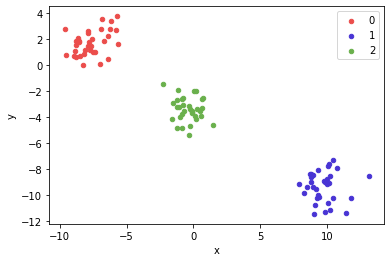

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples = 100, centers = 3, n_features = 2)
df = pd.DataFrame(dict(x = x[:, 0], y = x[:, 1], label = y))

colors = {0 : '#eb4d4b', 1 : '#4834d4', 2 : '#6ab04c'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
plt.show()      

In [5]:
df.head()

,x,y,label
0,-0.115193,-3.513262,2
1,-8.889024,1.042661,0
2,-8.507628,0.702023,0
3,10.174370,-9.098763,1
4,9.991975,-8.780323,1


In [6]:
points = df.drop('label', axis = 1) # label 삭제 
points.head()

,x,y
0,-0.115193,-3.513262
1,-8.889024,1.042661
2,-8.507628,0.702023
3,10.174370,-9.098763
4,9.991975,-8.780323


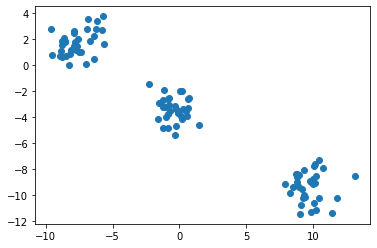

In [7]:
plt.scatter(points.x, points.y)
plt.show()

## 중심점 (Centroid) 계산

K-means 는 centroid-based clustering 알고리즘으로도 불린다. 

Centroid란, 주어진 cluster 내부에 있는 모든 점들의 중심부분에 위치한 (가상의) 점이다. 

In [8]:
dataset_centroid_x = points.x.mean()
dataset_centroid_y = points.y.mean()

print(dataset_centroid_x, dataset_centroid_y)

0.4632715243944104 -3.627929554384299


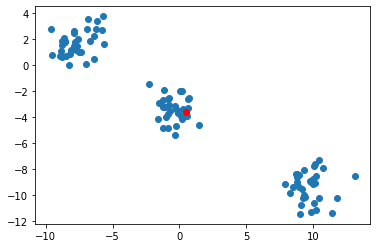

In [9]:
ax.plot(points.x, points.y)
ax = plt.subplot(1,1,1)
ax.scatter(points.x, points.y)
ax.plot(dataset_centroid_x, dataset_centroid_y, "or")
plt.show()

## 랜덤한 포인트를 가상 cluster의 centroid로 지정

In [10]:
centroids = points.sample(3) # k-means with 3 cluster
centroids

,x,y
83,9.330034,-9.964408
45,10.074929,-10.577461
15,8.976064,-8.446708


## 그래프에 표기 

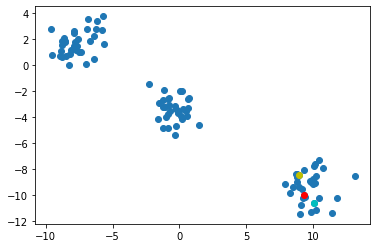

In [11]:
ax = plt.subplot(1,1,1)
ax.scatter(points.x, points.y)
ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "or")
ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "oc")
ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "oy")
plt.show()

In [12]:
import math
import numpy as np
from scipy.spatial import distance

def find_nearest_centroid(df, centroids, iteration):
 
  # 포인트와 centroid 간의 거리 계산
  distances = distance.cdist(df, centroids, 'euclidean')
  
  # 제일 근접한 centroid 선택
  nearest_centroids = np.argmin(distances, axis = 1)
    
  # cluster 할당
  se = pd.Series(nearest_centroids)
  df['cluster_' + iteration] = se.values
  
  return df

In [13]:
first_pass = find_nearest_centroid(points.select_dtypes(exclude='int64'), centroids, '1')
first_pass.head()

,x,y,cluster_1
0,-0.115193,-3.513262,2
1,-8.889024,1.042661,2
2,-8.507628,0.702023,2
3,10.174370,-9.098763,0
4,9.991975,-8.780323,2


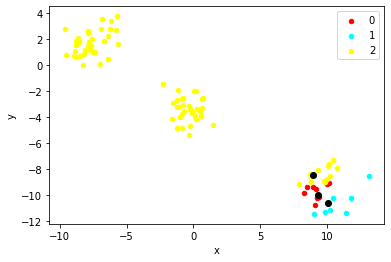

In [14]:
def plot_clusters(df, column_header, centroids):
  colors = {0 : 'red', 1 : 'cyan', 2 : 'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok") # 기존 중심점
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
  plt.show()
  
plot_clusters(first_pass, 'cluster_1', centroids)

In [15]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

centroids = get_centroids(first_pass, 'cluster_1')
centroids

,x,y
cluster_1,,
0,9.219035,-9.745770
1,10.747712,-10.600764
2,-1.607864,-2.201575


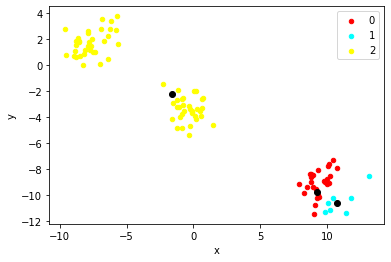

In [16]:
# 변경된 cluster에 대해 centroid 계산
centroids = get_centroids(first_pass, 'cluster_1')

second_pass = find_nearest_centroid(first_pass.select_dtypes(exclude='int64'), centroids, '2')

plot_clusters(second_pass, 'cluster_2', centroids)

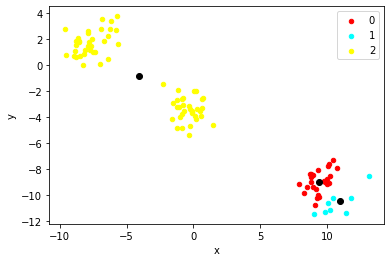

In [17]:
centroids = get_centroids(second_pass, 'cluster_2')

third_pass = find_nearest_centroid(second_pass.select_dtypes(exclude='int64'), centroids, '3')

plot_clusters(third_pass, 'cluster_3', centroids)

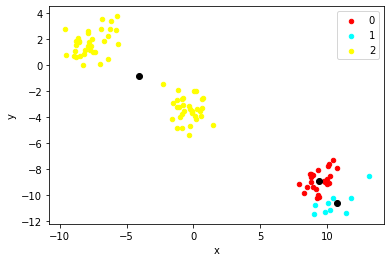

In [18]:
centroids = get_centroids(third_pass, 'cluster_3')

fourth_pass = find_nearest_centroid(third_pass.select_dtypes(exclude='int64'), centroids, '4')

plot_clusters(fourth_pass, 'cluster_4', centroids)

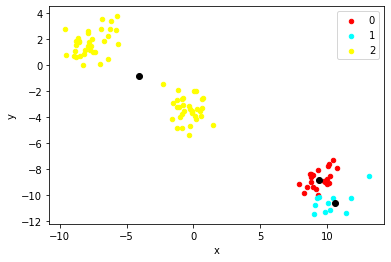

In [19]:
centroids = get_centroids(fourth_pass, 'cluster_4')

fifth_pass = find_nearest_centroid(fourth_pass.select_dtypes(exclude='int64'), centroids, '5')

plot_clusters(fifth_pass, 'cluster_5', centroids)

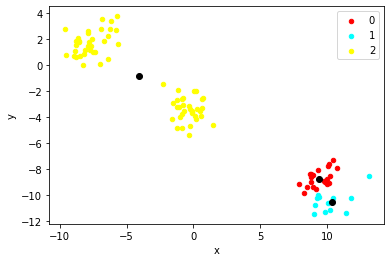

In [20]:
centroids = get_centroids(fifth_pass, 'cluster_5')

sixth_pass = find_nearest_centroid(fifth_pass.select_dtypes(exclude='int64'), centroids, '6')

plot_clusters(sixth_pass, 'cluster_6', centroids)

In [21]:
# 유의미한 차이가 없을 때 까지 반복, 이번 경우에는 전체 cluster에 변화가 없는 것을 기준으로 한다.
convergence = np.array_equal(fifth_pass['cluster_5'], sixth_pass['cluster_6'])
convergence

False

## K-means에서 K를 결정하는 방법

- **The Eyeball Method** :사람의 주관적인 판단을 통해서  임의로 지정하는 방법. 

- **Metrics** : 객관적인 지표를 설정하여, 최적화된 k를 선택하는 방법.

## K-means with Scikit-learn 

In [22]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)
labels = kmeans.labels_

print(labels)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 0 0 1 1 2 2 0 2 1 1 0 0 1 1 1 0 0 0 2 0 0 2 1 0 1 0 0 2 1 2 0 0 0 1 2 0
 0 0 2 0 0 0 1 2 1 2 2 2 1 0 2 2 0 1 2 0 1 1 2 2 1 2 1 1 0 1 1 1 2 1 2 0 0
 0 2 1 2 2 2 0 0 2 1 2 1 0 1 1 1 2 1 0 2 2 2 0 1 1 2]


In [23]:
new_series = pd.Series(labels)
df['clusters'] = new_series.values
df.head()

,x,y,label,clusters
0,-0.115193,-3.513262,2,2
1,-8.889024,1.042661,0,0
2,-8.507628,0.702023,0,0
3,10.174370,-9.098763,1,1
4,9.991975,-8.780323,1,1


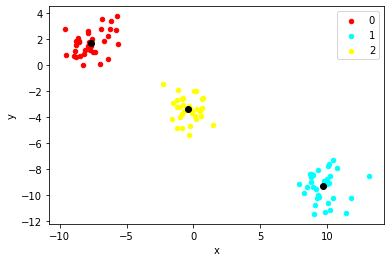

In [24]:
centroids = get_centroids(df, 'clusters')
plot_clusters(df, 'clusters', centroids)

## Elbow methods

In [ ]:
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

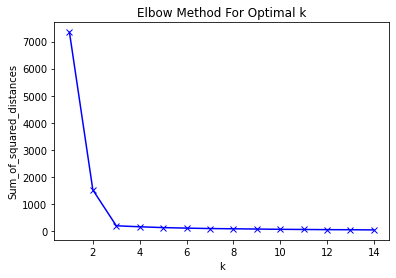

In [26]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Initial Centoid state

k-means는 centroid를 어떻게 선택하느냐에 따라서, clustering의 결과가 안 좋거나 끝없이 반복해야 하는 경우도 있다.

## Time complexity

<img src='https://www.researchgate.net/profile/Jie_Yang224/publication/337590055/figure/tbl10/AS:830050941272075@1574910974902/Comparison-of-time-complexity-of-different-clustering-algorithms.png' width = 500>

# 완벽한 알고리즘은 없다.

k-means 말고도 상당히 많은 clustering 알고리즘들이 있으며 

각자 `풀고자 하는 문제`에 대해서 최적화되어있다. 

그러나, 최적화된 문제를 제외한 다른부분에는 장점을 보이지 못한다는 단점도 있다. 

## 이게 어떤 의미를 갖나?

1) 문제 해결을 위해서 여러 방법이 있지만 항상 각각의 장단점이 있다. 그렇기 때문에 더 많은 방법들을 시도해보고 알고 있을 수록 더 다양한 문제에 대한 답을 줄 수 있다는 의미를 가지며 이것은 여러분이 앞으로도 계속 **연구**를 해야 하는 이유이다.

2) 한가지 더, 다양한 방법들을 선택하는 최선의 기준은 데이터의 특성일 것이다. 즉 데이터에 대한 이해가 없다면, 아무리 좋은 방법이 있다고 해도 사용을 할 수 없기 때문에 이것이 **도메인에 대한 지식이 필요한 이유** 이다.

<img src='https://cdn-images-1.medium.com/max/1600/1*oNt9G9UpVhtyFLDBwEMf8Q.png' width = 500>

# Exercise

## 1. 아래의 주소를 참조하여, 데이터를 `df`에 준비하라.

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

- Feature마다 scale이 다르기 때문에 `StandardScaler`를 적용해야 한다.
- 이후,  "diagnosis"에 있는 label 데이터를 따로 `label`이라는 변수로 생성.
- "diagnosis"를 제거한 나머지 데이터를 사용하여 k-means clustering을 하며, 
- `n_clusters = 2`, `random_state = 42`를 제외한 다른 parameter는 default option을 사용한다.

In [27]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action='ignore') 

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
filename = '/content/drive/MyDrive/DS_camp/session1/cancer_data.csv'
data = pd.read_csv(filename)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [30]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [31]:
data.drop(['Unnamed: 32'], axis = 1, inplace = True)

In [32]:
df = data.set_index('id')
df.colums = ['diagnosis']
df.rename(columns={'diagnosis' : 'label'}, inplace=True)
df[['label']]

,label
id,
842302,M
842517,M
84300903,M
84348301,M
84358402,M
...,...
926424,M
926682,M
926954,M


In [33]:
df_feature = df.drop(['label'], axis = 1)
df_feature

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [34]:
scale = StandardScaler().fit_transform(df_feature.values)
df_scale = pd.DataFrame(scale, index = df_feature.index, columns=df_feature.columns)
df_scale

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
926682,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
926954,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409


In [35]:
kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans.fit(df_scale)
label = kmeans.labels_

In [36]:
prediction = pd.Series(label)
df_scale['clusters'] = prediction.values
df_scale

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,0
926682,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,0
926954,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,0


## 2. 원래 데이터의 label과, clustering 이후의 라벨을 비교하여 accuracy를 측정하고 결과를 `Acc`에 저장하라. 

- Acc = 전체 데이터 중 라벨이 일치하는 데이터 수 이다.

ex)

|원래 라벨|cluster 이후 label|
|:-:|:-:|
|A|A|
|A|B|
|A|A|
|B|B|
|B|B|
|B|A|

accuracy = $(2 + 2) \over 6$

이때 아래의 코드를 참고하여 `0`과 `1`로 있는데이터를 `M`과 `B`로 바꿔서 작업하면 좋다. 

```python
label2 = label2.replace(0,'M')
label2 = label2.replace(1,'B')
```

In [37]:
from sklearn.metrics import accuracy_score
df_scale.column = ['clusters']
df_scale.rename(columns = {'clusters':'label2'}, inplace = True)
label2 = df_scale[['label2']]
label2 = df_scale['label2']
label2 = label2.replace(0, 'M')
label2 = label2.replace(1, 'B')
label2

id
842302      M
842517      M
84300903    M
84348301    M
84358402    M
           ..
926424      M
926682      M
926954      M
927241      M
92751       B
Name: label2, Length: 569, dtype: object

In [38]:
df_label = df[['label']]
contr = pd.concat([df_label, label2], axis = 1)
contr

,label,label2
id,,
842302,M,M
842517,M,M
84300903,M,M
84348301,M,M
84358402,M,M
...,...,...
926424,M,M
926682,M,M
926954,M,M


In [39]:
Acc = accuracy_score(df_label, label2)
Acc

0.9103690685413005

# 3. 아래 링크를 참조하여 hierarchical clustering을 breast cancer dataset에 적용하고, 그 결과를 시각화 하라.

<https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering>

In [40]:
df_scale.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label2
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


In [41]:
df_scale = df_scale.drop('label2', axis = 1)
df_scale.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


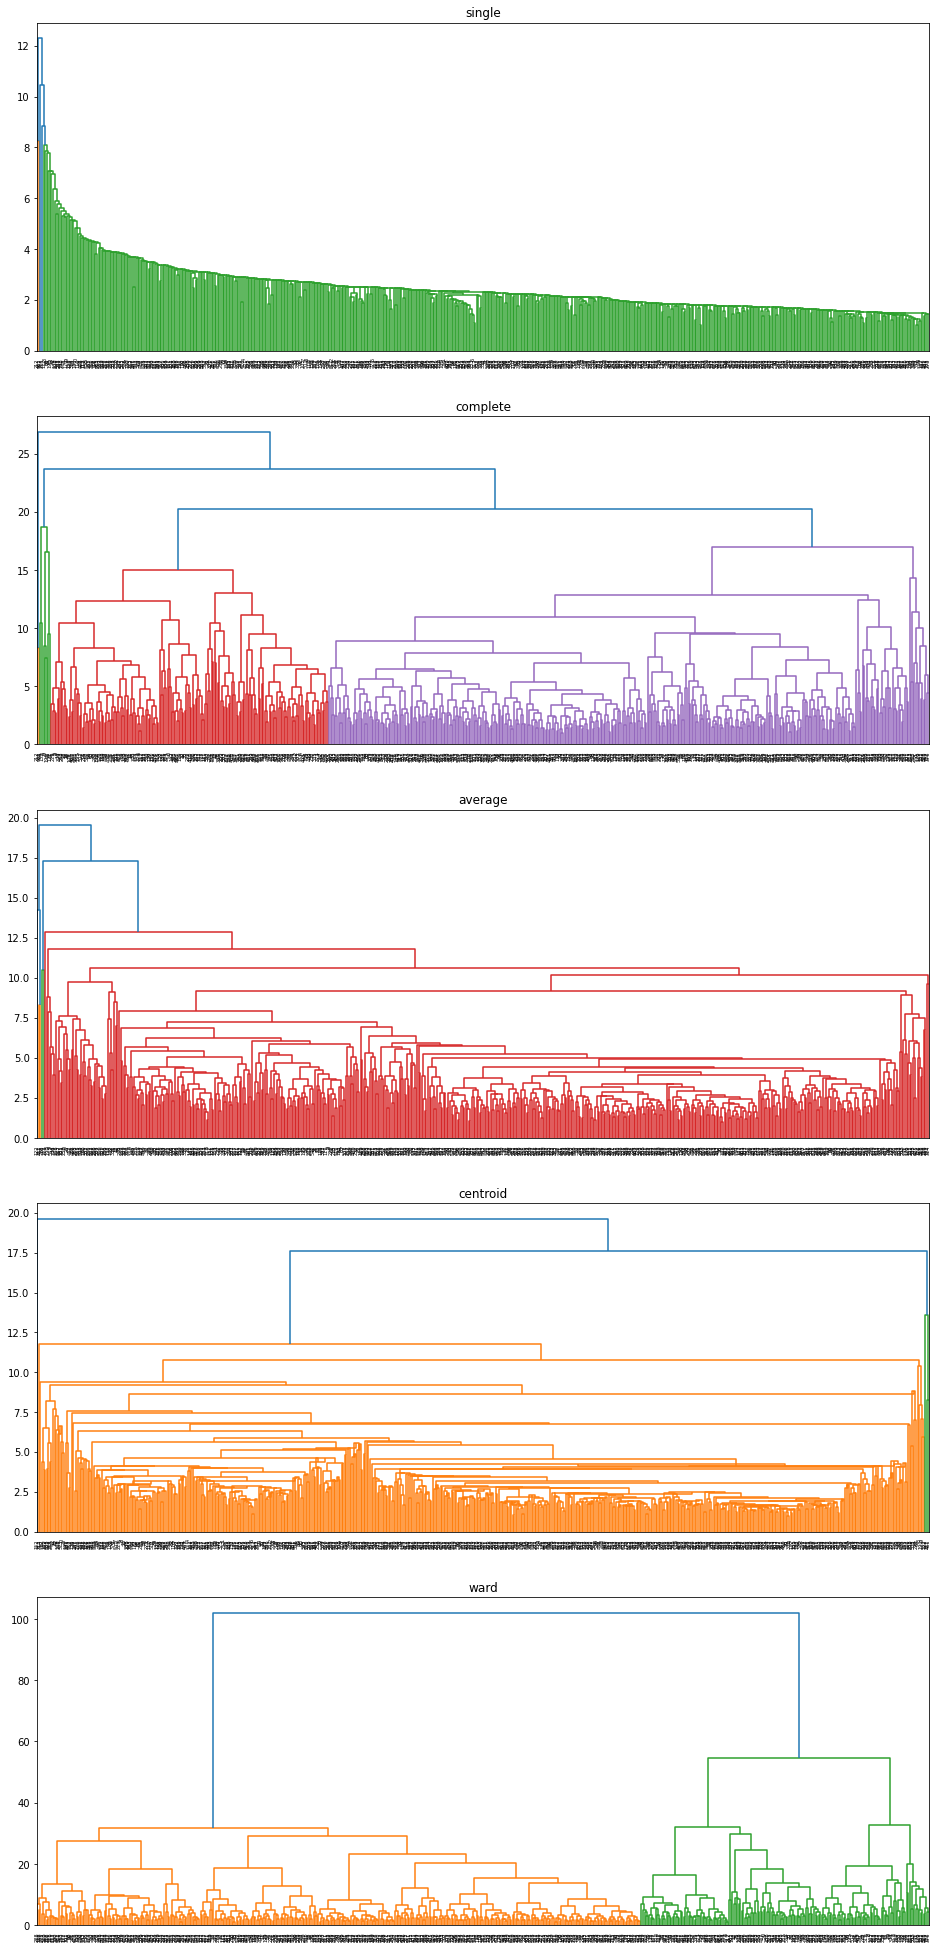

In [42]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_list = ['single', 'complete', 'average', 'centroid', 'ward']
data = df_scale

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(16, 35))
for i in range(5):
  hierarchical_single = linkage(data, method=linkage_list[i])
  dn = dendrogram(hierarchical_single, ax = axes[i])
  axes[i].title.set_text(linkage_list[i])

plt.show()

뭔가 와드연결법으로 계산한 결과물이 그나마 잘 군집화가 이루어진 것 같다.

군집을 11로 해서 클러스터링을 시각화 해 보자

In [43]:
from sklearn.cluster import KMeans

def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(df_scale)
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.figure(1 , figsize = (12, 6))
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

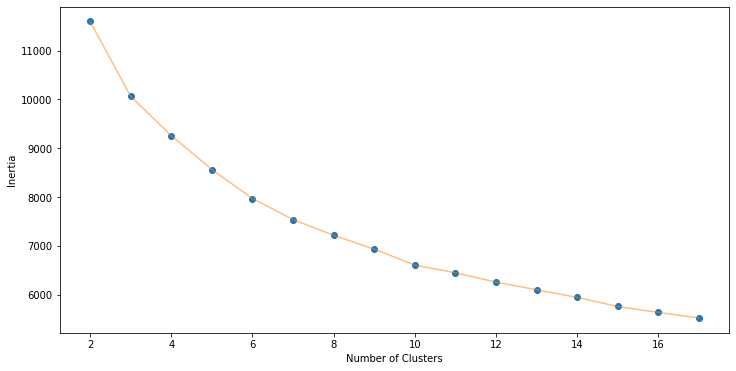

In [44]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

change_n_clusters(n_clusters, df_scale)

In [45]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(3)
cancer_pca = pca.fit_transform(df_scale)
df_pca = pd.DataFrame(data = cancer_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca

,PC1,PC2,PC3
0,9.192837,1.948583,-1.123177
1,2.387802,-3.768172,-0.529314
2,5.733896,-1.075174,-0.551747
3,7.122953,10.275589,-3.232799
4,3.935302,-1.948072,1.389749
...,...,...,...
564,6.439315,-3.576818,2.459477
565,3.793382,-3.584048,2.088477
566,1.256179,-1.902297,0.562736
567,10.374794,1.672010,-1.877024


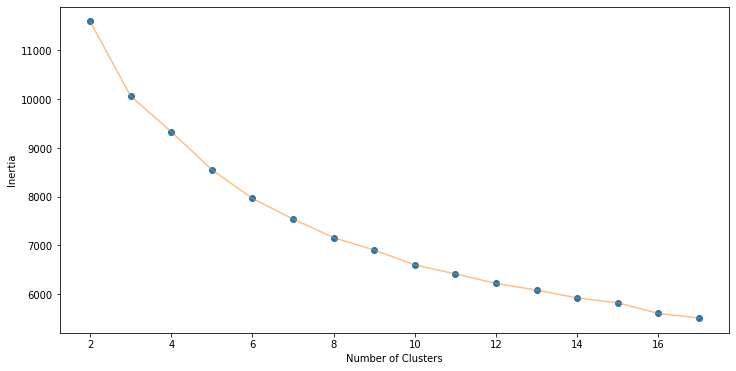

In [46]:
change_n_clusters(n_clusters, df_pca)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [10.0, 10.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [25.0, 25.0, 80.0, 80.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [105.0, 105.0, 123.75, 123.75],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [163.75, 163.75, 202.5, 202.5],
  [114.375, 114.375, 183.125, 183.125],
  [52.5, 52.5, 148.75, 148.75],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [255.0, 255.0, 265.0, 265.0],
  [232.5, 232.5, 260.0, 260.0],
  [275.0, 275.0, 285.0, 285.0],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [300.0, 300.0, 320.0, 320.0],
  [280.0, 280.0, 310.0, 310.0],
  [246.25, 246.25, 295.0, 295.0],
  [335.0, 335.0, 345.0

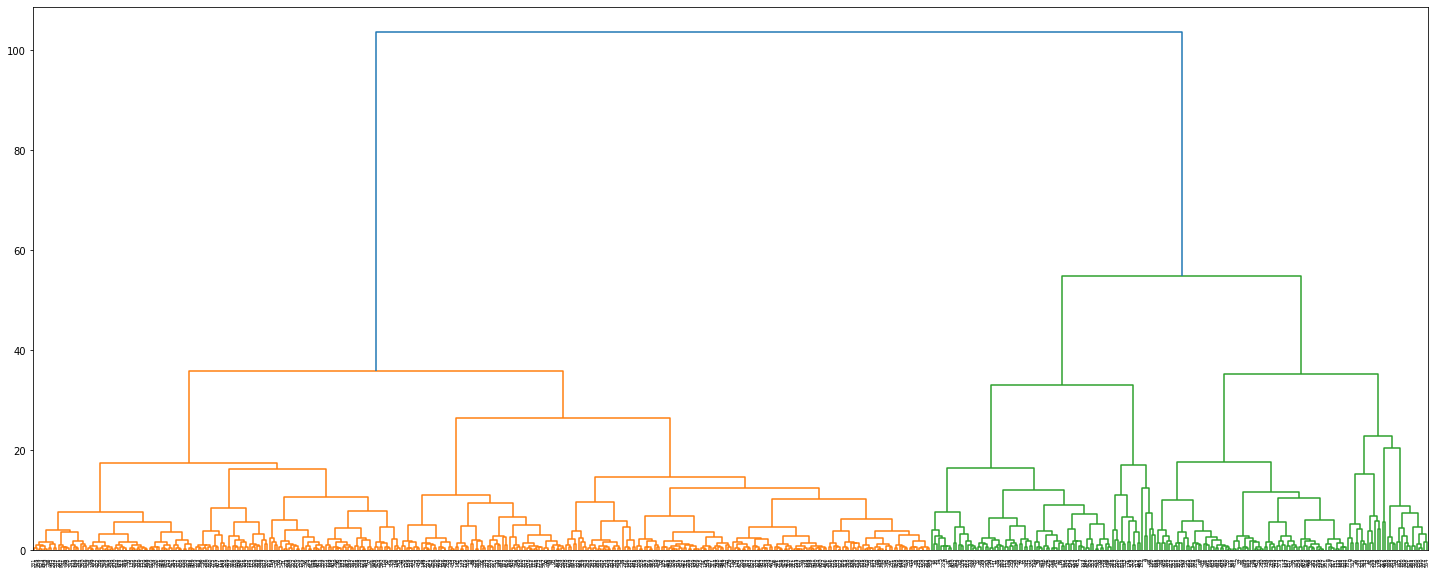

In [47]:
clusters3 = linkage(y = df_pca, method='ward', metric='euclidean')
plt.figure(figsize=(25,10))
dendrogram(clusters3)

In [48]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=7, linkage='ward')
cancer_labels = agg_clustering.fit_predict(df_pca)

In [49]:
cancer_labels

array([0, 1, 1, 4, 1, 2, 1, 2, 2, 4, 6, 2, 0, 6, 2, 2, 6, 2, 1, 6, 3, 3,
       2, 1, 1, 0, 2, 1, 2, 6, 1, 2, 2, 1, 2, 2, 2, 5, 5, 2, 5, 2, 0, 2,
       6, 2, 3, 2, 5, 6, 5, 5, 5, 1, 6, 5, 1, 2, 5, 3, 3, 3, 2, 3, 2, 2,
       3, 5, 4, 5, 1, 4, 2, 6, 5, 6, 3, 0, 0, 3, 3, 2, 0, 1, 3, 1, 6, 1,
       3, 2, 6, 6, 5, 6, 2, 1, 3, 3, 5, 2, 6, 3, 5, 3, 3, 2, 3, 5, 0, 3,
       3, 3, 4, 3, 3, 3, 3, 2, 2, 6, 5, 1, 0, 6, 5, 5, 6, 1, 2, 1, 3, 1,
       1, 6, 1, 3, 5, 5, 1, 3, 5, 6, 3, 5, 5, 3, 2, 3, 6, 5, 3, 4, 4, 5,
       3, 3, 1, 6, 5, 5, 3, 1, 1, 3, 1, 5, 5, 6, 1, 6, 3, 6, 2, 3, 5, 3,
       4, 2, 5, 5, 0, 0, 1, 3, 6, 3, 6, 5, 5, 5, 4, 5, 5, 2, 2, 5, 2, 1,
       1, 2, 3, 1, 0, 2, 3, 6, 3, 6, 2, 5, 1, 5, 0, 4, 2, 2, 3, 3, 1, 1,
       5, 3, 3, 2, 6, 6, 5, 6, 6, 2, 2, 5, 5, 1, 3, 5, 0, 1, 6, 1, 6, 5,
       2, 5, 1, 3, 5, 2, 3, 3, 0, 5, 0, 1, 1, 2, 0, 2, 0, 2, 1, 6, 1, 5,
       1, 0, 3, 5, 3, 3, 5, 5, 0, 3, 6, 3, 5, 6, 5, 5, 1, 5, 1, 2, 3, 5,
       3, 5, 4, 3, 4, 6, 3, 5, 5, 5, 5, 5, 5, 3, 0,

In [50]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df_pca)

KMeans(n_clusters=7)

In [51]:
from mpl_toolkits.mplot3d import Axes3D

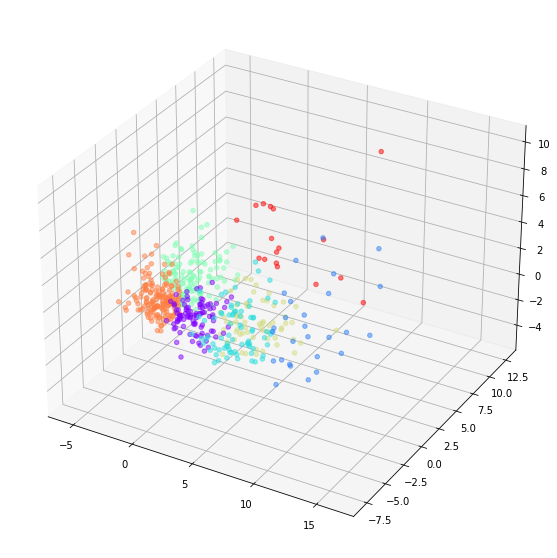

In [52]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') 

x = df_pca['PC1']
y = df_pca['PC2']
z = df_pca['PC3']
ax.scatter(x, y, z, c = kmeans.labels_, s= 20, alpha=0.5, cmap='rainbow')